# COSC 3337: Data Science I
# Homework 1 (Regression)

# Dr. Rizk

### [100 points]


_About The Data_

The data we'll be using comes from kaggle, and contains the following car attributes:

    car_ID
    symboling
    CarName
    fueltype
    aspiration
    doornumber
    carbody
    drivewheel
    enginelocation
    wheelbase
    carlength
    carwidth
    carheight
    curbweight
    enginetype
    cylindernumber
    enginesize
    fuelsystem
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    citympg
    highwaympg
    price

## Problem Statement

You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car



## Part 1: Reading and Understanding the Data

### [8 points]

Begin by importing some necessary libraries that you'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

1.1 Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

[3 Points]

In [3]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

1.2 Print some basic statistics of your data.

[3 Points]

In [4]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

1.3 Print some general information about your data using pandas.

[2 Points]

In [5]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

### TYPE YOUR ANSWER HERE

## Part 2: Data Cleaning and Preparation

### [7 Points]

2.1 Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

[3 Points]

In [6]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


2.2 Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

[4 Points]

In [7]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

The unique companies in our dataset are:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


## Part 3: Visualising Categorical Data

### [50 points]


    CompanyName
    Symboling
    fueltype
    enginetype
    carbody
    doornumber
    enginelocation
    fuelsystem
    cylindernumber
    aspiration
    drivewheel

3.1 Create the following plots

    1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
    2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

[4 Points]

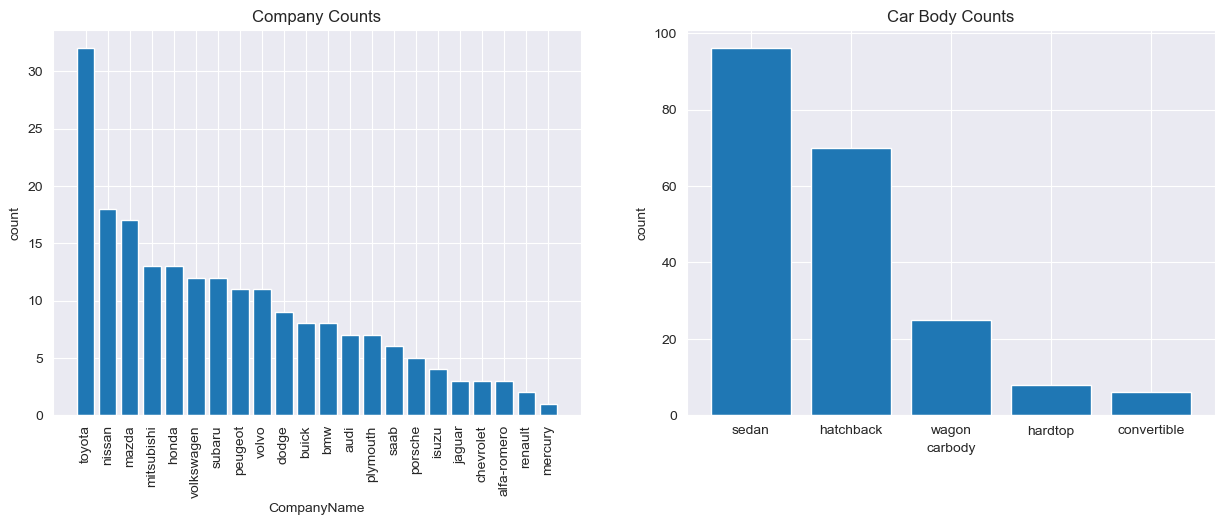

In [8]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.2 Create the following plots

    1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
    2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

[4 Points]

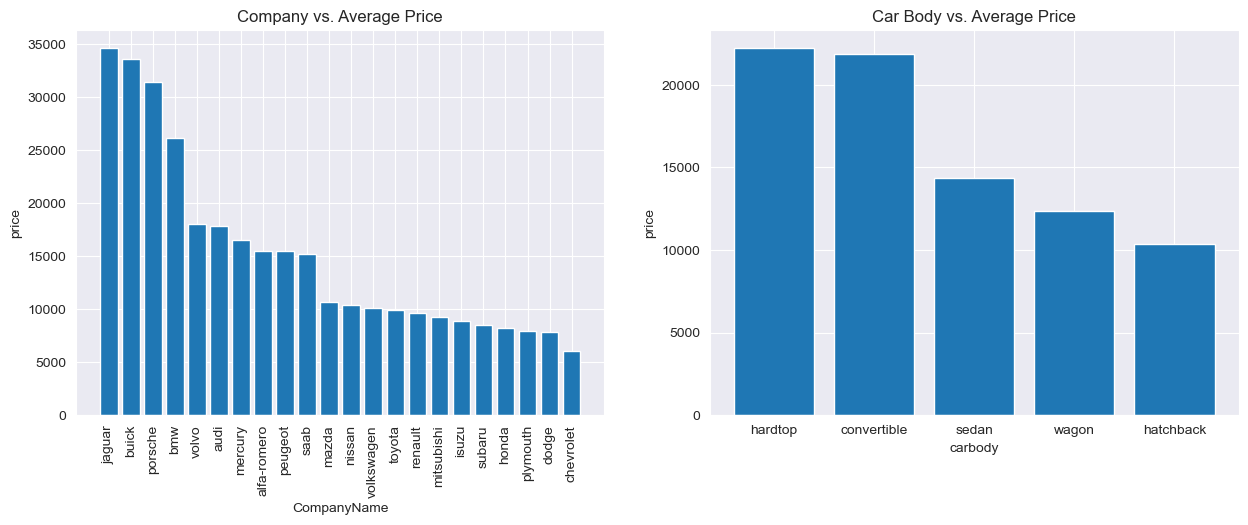

In [9]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.3 Create the following plots

    1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
    2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

[4 Points]

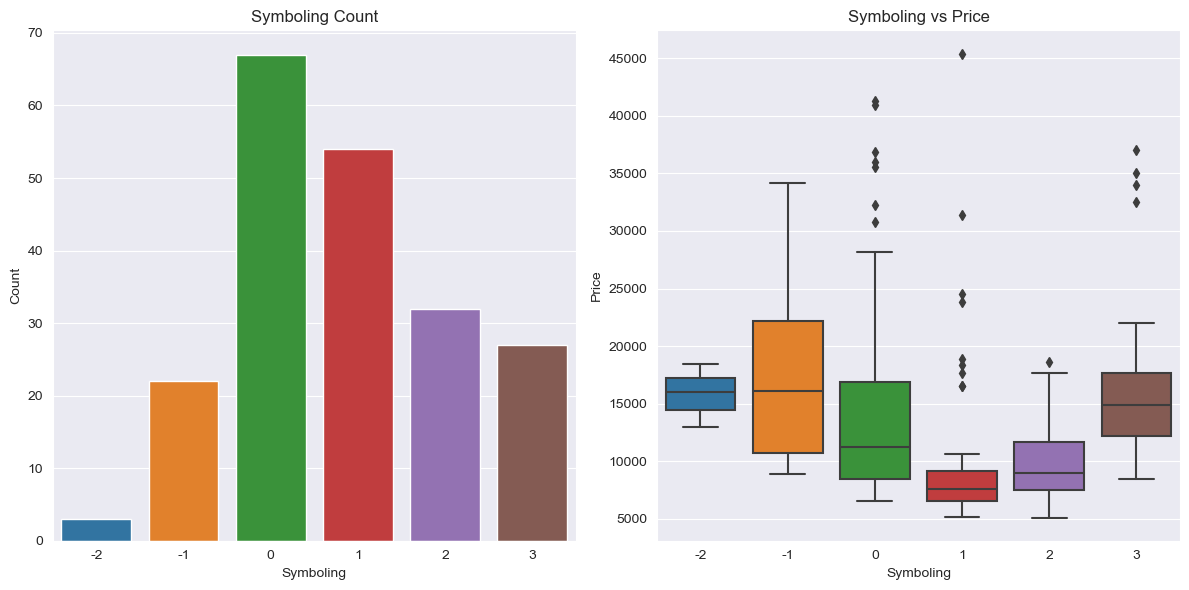

In [10]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.4 Create the following plots

    1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginetype on the x-axis and price on the y-axis.

[4 Points]

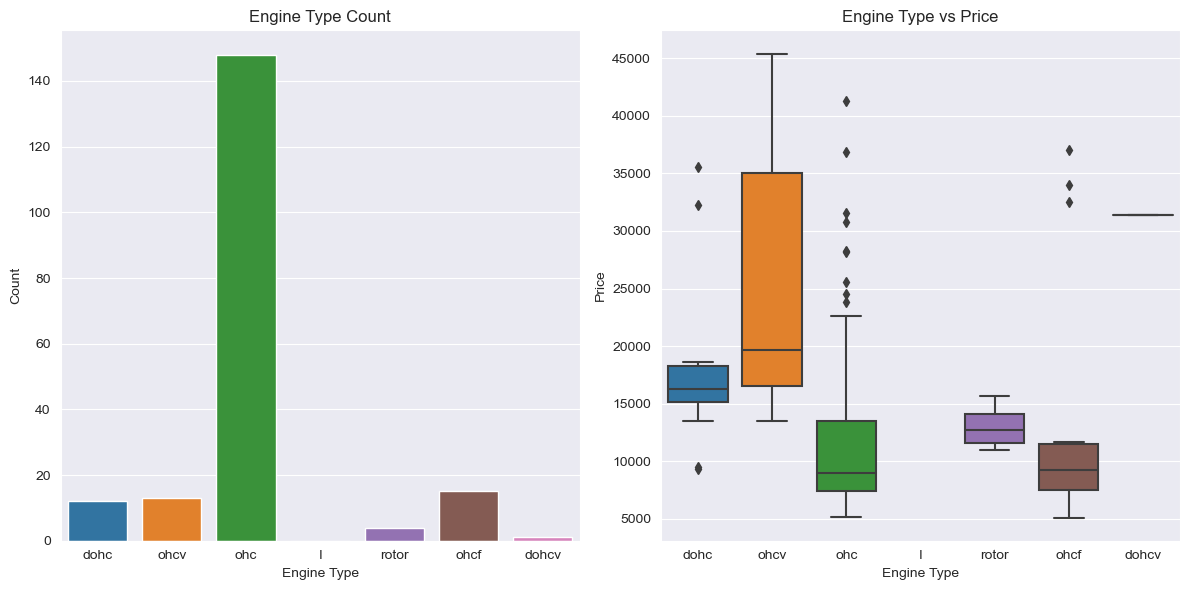

In [11]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.5 Create the following plots

    1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of cylindernumber on the x-axis and price on the y-axis.

[4 Points]

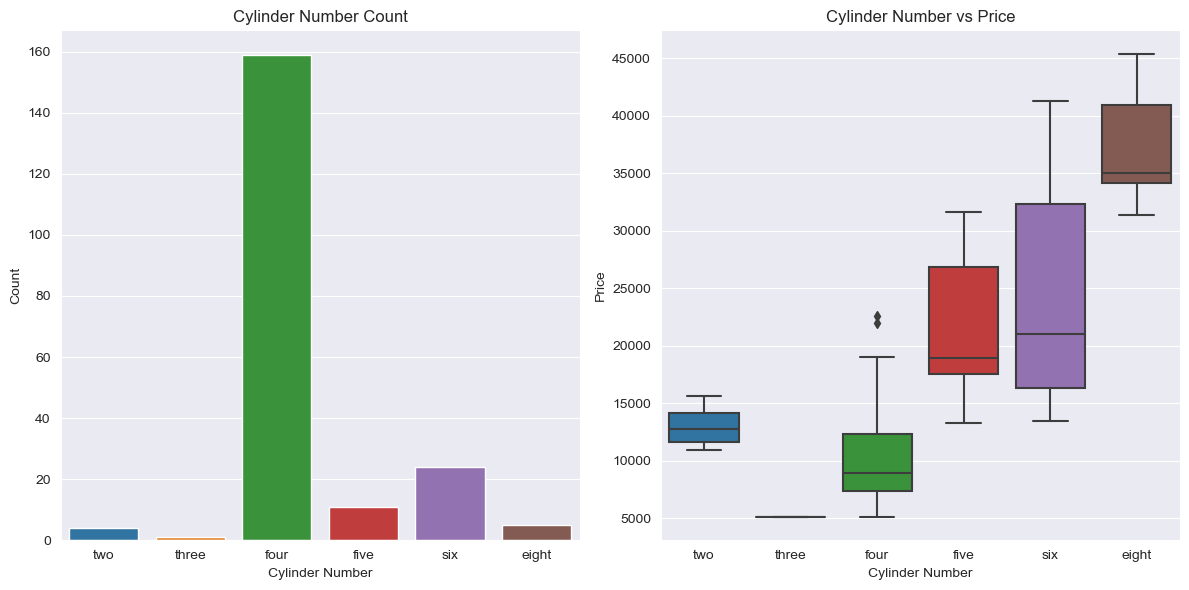

In [12]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.6 Create the following plots

    1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
    2. A box plot of fuelsystem on the x-axis and price on the y-axis.

[5 Points]

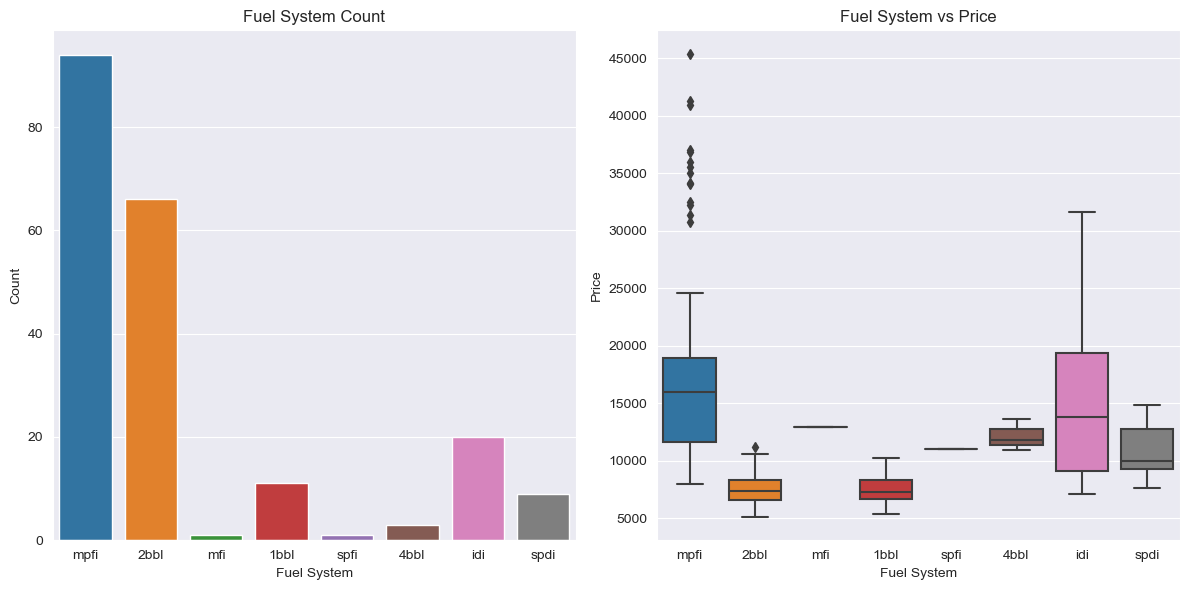

In [13]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.7 Create the following plots

    1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
    2. A box plot of drivewheel on the x-axis and price on the y-axis.

[5 Points]

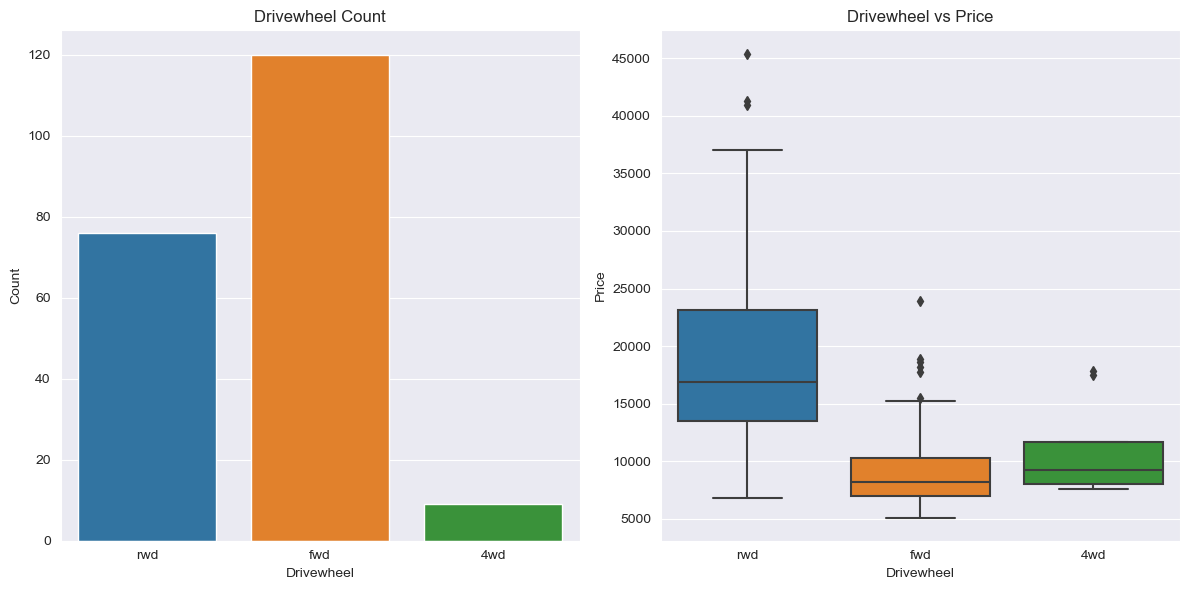

In [14]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.8 Create the following plots

    1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
    2. A box plot of enginelocation on the x-axis and price on the y-axis.

[5 Points]

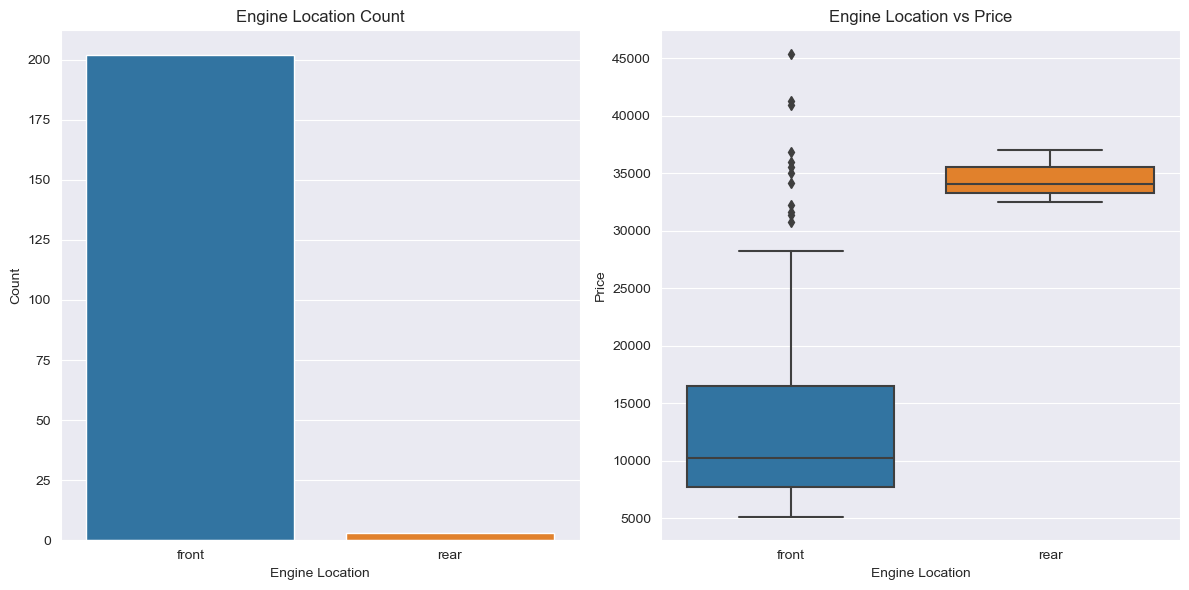

In [15]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.9 Create the following plots

    1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
    2. A box plot of fueltype on the x-axis and price on the y-axis.

[5 Points]

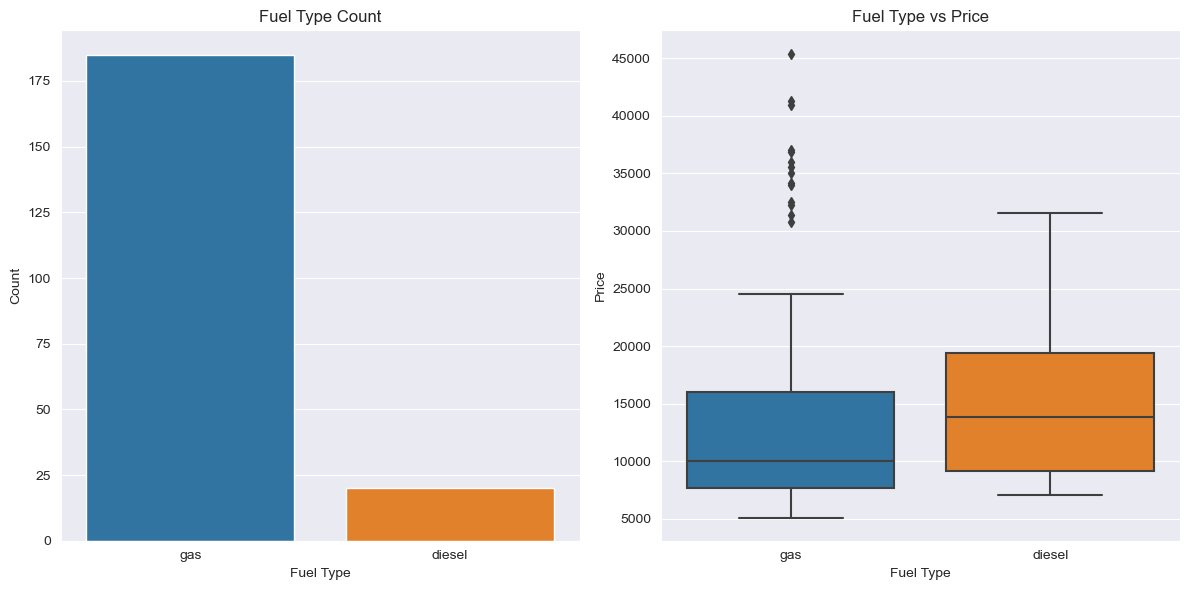

In [16]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.10 Create the following plots

    1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
    2. A box plot of doornumber on the x-axis and price on the y-axis.

[5 Points]

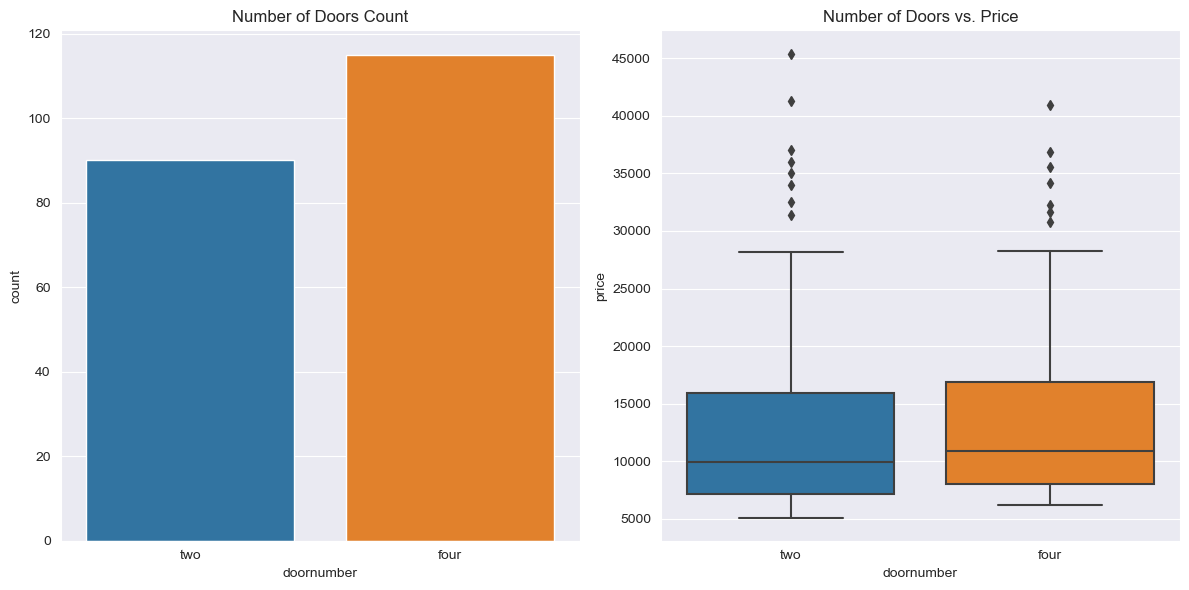

In [17]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

3.11 Create the following plots

    1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
    2. A box plot of aspiration on the x-axis and price on the y-axis.

[5 Points]

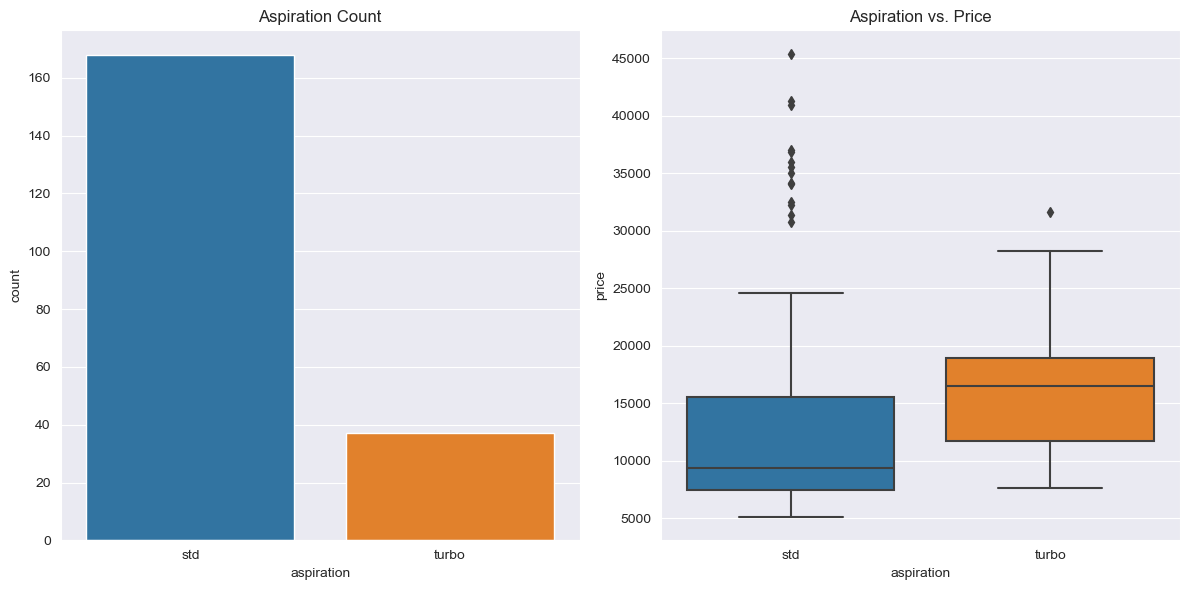

In [18]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

## Part 4: Visualizing Numerical Data

### [15 Points]

    price
    carlength
    carwidth
    carheight
    curbweight
    enginesize
    boreratio
    stroke
    compressionratio
    horsepower
    peakrpm
    wheelbase
    citympg
    highwaympg

4.1 Create the following plots

    1. A plot showing the price distribution
    2. A box plot of price

[3 Points]

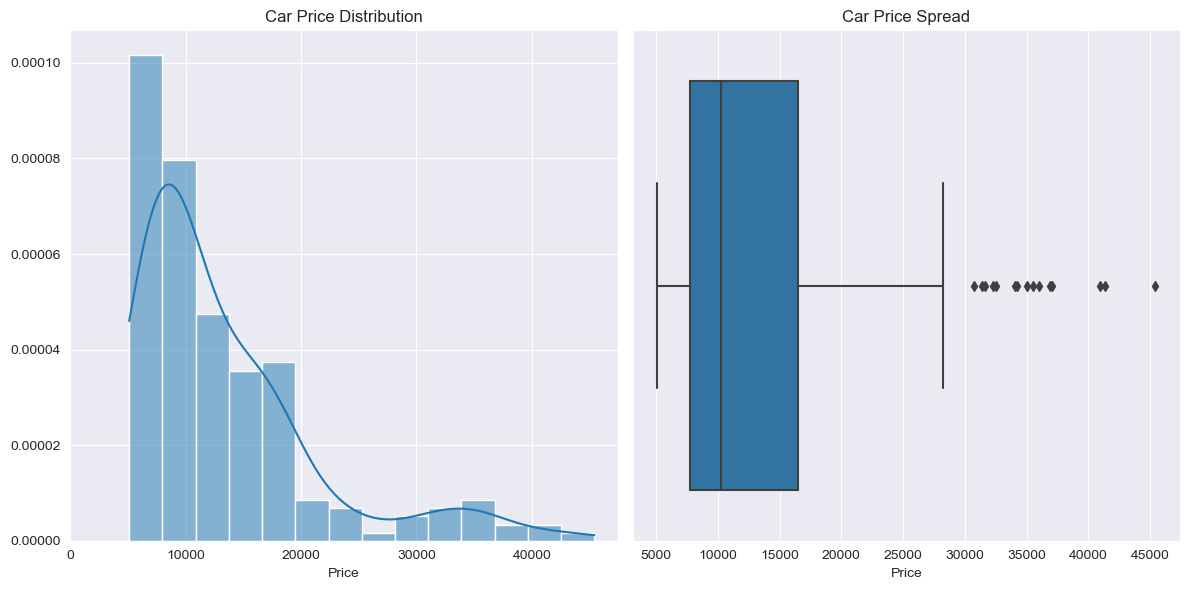

In [19]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating these 2 plots, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

Let's try and get an idea of how the car attributes related to a car's size are related to price.

4.2 Create the following plots

    1. A scatter plot of carlength vs price.
    2. A scatter plot of carwidth vs price.
    3. A scatter plot of carheight vs price.
    4. A scatter plot of carweight vs price.

[3 Points]

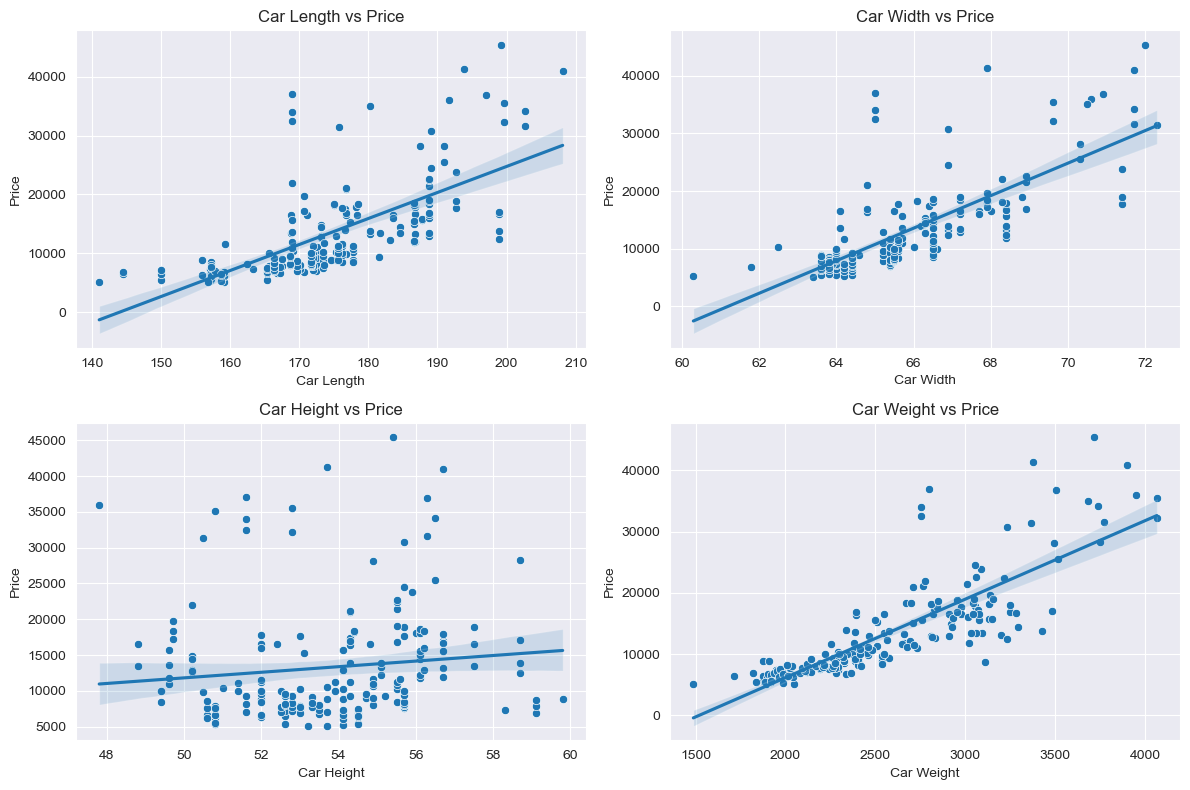

In [20]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the 4 plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

4.3 Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

    1. A scatter plot of enginesize vs price.
    2. A scatter plot of boreratio vs price.
    3. A scatter plot of stroke vs price.
    4. A scatter plot of compressionratio vs price.
    5. A scatter plot of horsepower vs price.
    6. A scatter plot of peakrpm vs price.
    7. A scatter plot of wheelbase vs price.
    8. A scatter plot of citympg vs price.
    9. A scatter plot of highwaympg vs price.

[3 Points]

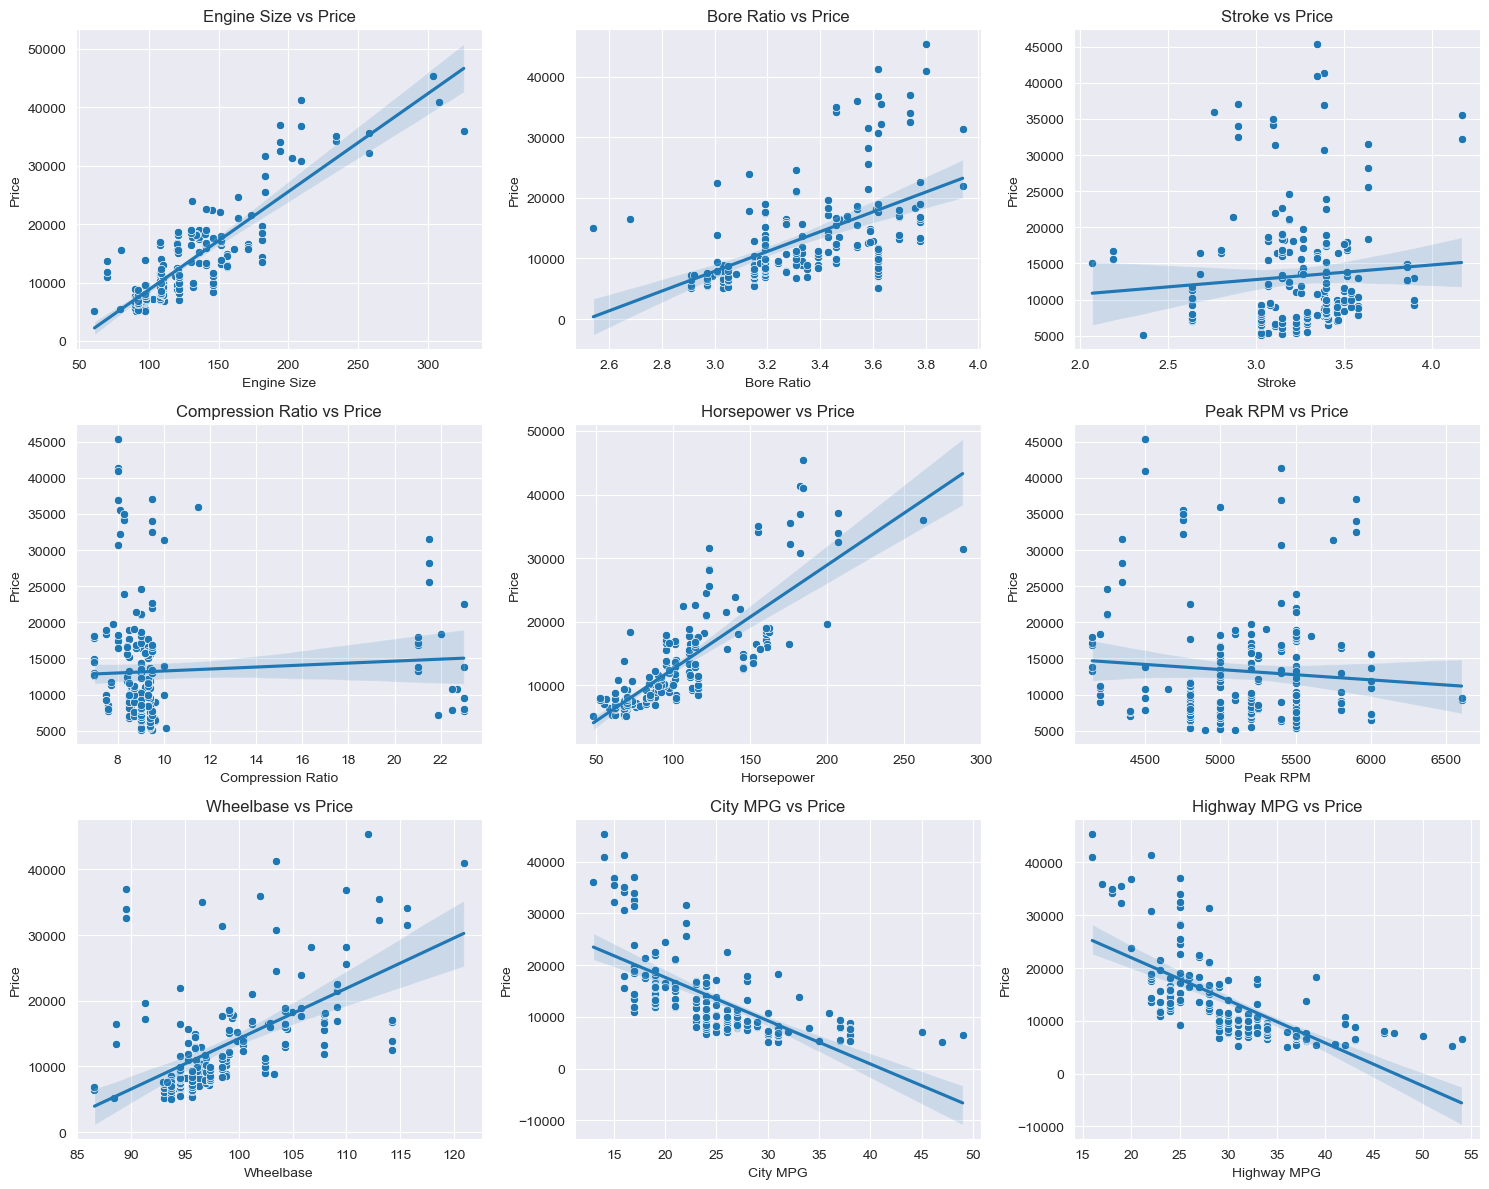

In [21]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plots above, describe what we can conclude from them.

### TYPE YOUR ANSWER HERE

4.4 Create a heatmap or correlation matrix to inspect the correlations in our dataset.

[3 Points]

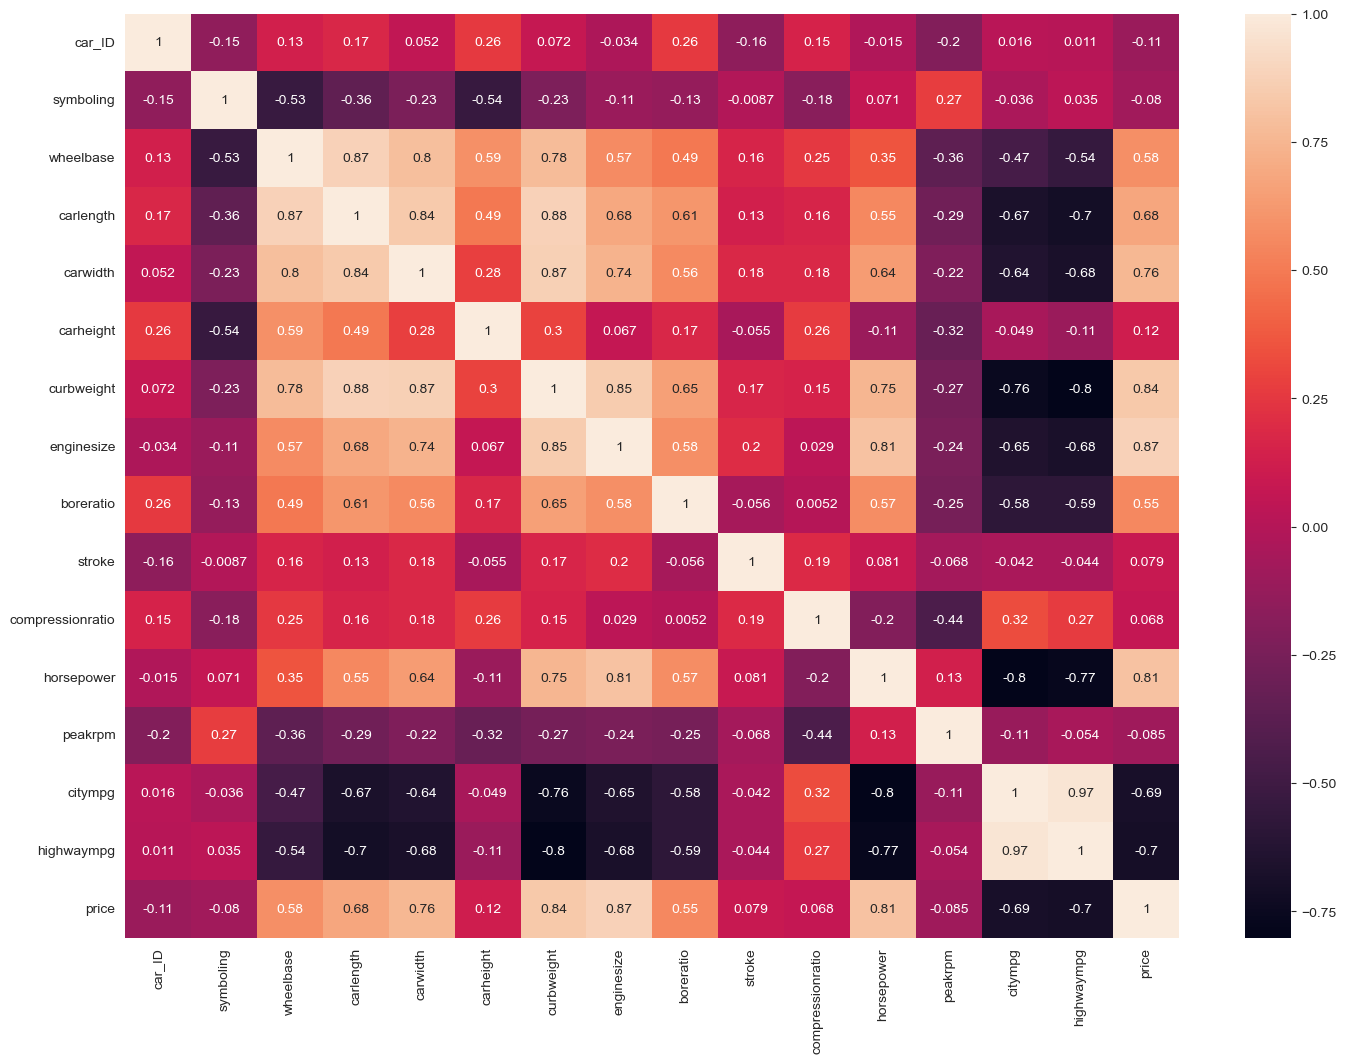

In [22]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

### TYPE YOUR ANSWER HERE

4.5 For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.


In [23]:
### WRITE YOUR CODE HERE ###

After visual analysis, which variables do you believe to be significant when predicting price, and why?

[3 Points]

### TYPE YOUR ANSWER HERE

## Part 5: Data Pre-Processing

### [5 Points]

Perform the following

    1. Convert your categorical variables into dummy variables
    2. Scale the data using a scaler of your choice
    3. Split your data into a training and testing set, with test size of 0.30



In [25]:
### WRITE YOUR CODE HERE ###

## Part 6: Model Creation and Evaluation

### [15 Points]

Perform the following using sklearn

    1. Create a linear regression model, and train (fit) it on the training data.
    2. Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
    4. Create a scatter plot of the true price labels vs the predicted price value of your model.
    5. Create a histogram of the residuals
    6. Print the $R^2$ of your model

_Note: You don't need to obtain the same results as us. If you made any changes earlier and obtain better results, then even better. Just make sure you're not scoring significantly lower than our obtained values._

[8 Points]

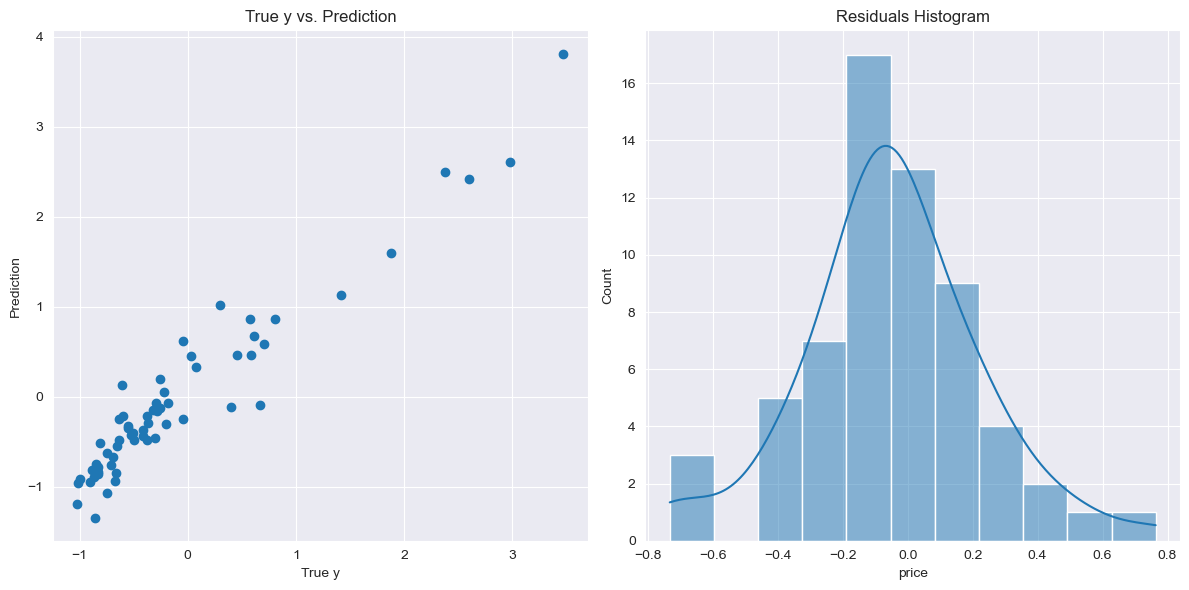

R-Squared:  0.9197702880722134


In [28]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.

[7 Points]

In [29]:
### WRITE YOUR CODE HERE, WHICH SHOULD REPRODUCE THE BELOW IF DONE CORRECTLY ###

Coefficient
symboling             -7.848090e-03
wheelbase              5.444424e-02
carlength             -3.489453e-02
carwidth               1.349389e-01
carheight              4.958253e-03
curbweight             2.695517e-01
enginesize             5.930320e-01
boreratio             -6.541650e-02
stroke                -1.477867e-01
compressionratio      -4.356384e-01
horsepower             6.012575e-02
peakrpm                1.527539e-01
combined_mpg           1.544217e-02
fueltype_gas          -8.441505e-01
aspiration_turbo       1.125684e-01
doornumber_two         3.953929e-02
carbody_hardtop       -1.687039e-01
carbody_hatchback     -3.287114e-01
carbody_sedan         -2.044202e-01
carbody_wagon         -4.431190e-01
drivewheel_fwd        -1.234479e-02
drivewheel_rwd         1.110542e-01
enginelocation_rear    7.071464e-01
enginetype_dohcv      -5.557214e-01
enginetype_l          -3.113307e-02
enginetype_ohc         5.146253e-01
enginetype_ohcf        3.182765e-01
enginetype_ohcv       -5.363226e-01
enginetype_rotor       6.354961e-02
cylindernumber_five   -1.135859e+00
cylindernumber_four   -1.122171e+00
cylindernumber_six    -7.463461e-01
cylindernumber_three   7.216450e-16
cylindernumber_twelve -1.305888e+00
cylindernumber_two     6.354961e-02
fuelsystem_2bbl        6.061394e-02
fuelsystem_4bbl       -1.016685e-01
fuelsystem_idi         8.441505e-01
fuelsystem_mfi        -4.546926e-01
fuelsystem_mpfi        7.828639e-03
fuelsystem_spdi       -3.853027e-01
fuelsystem_spfi        0.000000e+00

What do __your__ coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

### TYPE YOUR CONCLUSION HERE